#

# Compute area

### path and inputs

In [3]:
cd "C:\\Code\\ditto_v2"

C:\Code\ditto_v2


In [4]:
%pwd

'C:\\Code\\ditto_v2'

In [15]:
# Define the center point and radius
lat, lon = 50.0, 10.0  # Example coordinates
radius_km = 30
radius = radius_km * 1000  # Convert km to meters

### 

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\User\AppData\Local\Temp\ipykernel_13216\2671012487.py:5: SyntaxWarning: invalid escape sequence '\D'
  gdf_de = gpd.read_file('JupNB\DE_Data\VG250_GEM_WGS84.shp')


shape=(1, 30)


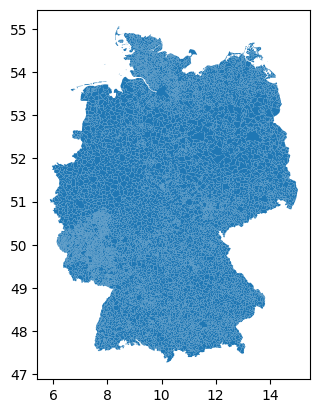

In [ ]:
from shapely.geometry import Point
import geopandas as gpd

## GeoDataFrame with Germany's state boundaries
gdf_de = gpd.read_file('JupNB\DE_Data\VG250_GEM_WGS84.shp')


# Create a point object
point = Point(lon, lat)

result = gdf_de.geometry.contains(point)
gdf_point = gdf_de[result]

if gdf_point.empty:
    print('No data found')
else:
    print(f'shape={gdf_point.shape}')
    
# Plots
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# gdf_circle.plot(ax=ax, color='red', alpha=0.5)
gdf_de.plot(ax=ax)
plt.show()

In [17]:
l_epsg = [6933, 
          3857,    ## metric coordinate system 
        #   3310,
          #4326,
]
l_color = ['green', 
           'red',
        #    'red'
           ]
l_cols_non_serializable = [
    # 'centroid',  # Geometry Points
    'WSK','BEGINN', # Datetimes
]

In [18]:
gdf_de.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
dict_gdf_de = {}

for epsg in l_epsg:
    gdf_epsg = gdf_de.to_crs(epsg=4326)
    
    gdf_projected = gdf_epsg.to_crs(epsg=epsg)
    gdf_epsg['KFL_GPD'] = round(gdf_projected.geometry.area / 10**6, 2)

    gdf_epsg = gdf_epsg.to_crs(epsg=4326)
    
    # gdf_epsg['centroid'] = gdf_epsg.geometry.centroid
    gdf_epsg['lat'] = gdf_epsg.geometry.centroid.y
    gdf_epsg['lon'] = gdf_epsg.geometry.centroid.x


    gdf_epsg = gdf_epsg.to_crs(epsg=epsg)
    dict_gdf_de[epsg] = gdf_epsg

# # Compute the centroid of each geometry
# gdf_de['centroid'] = gdf_de['geometry'].centroid
# # Extract latitude and longitude from the Point geometries
# gdf_de['lon'] = gdf_de['geometry'].centroid.x
# gdf_de['lat'] = gdf_de['geometry'].centroid.y
# # dict_gdf_de[3857] = gdf_de.to_crs(epsg=3857)
gdf_epsg.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13216\1201309493.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_epsg['lat'] = gdf_epsg.geometry.centroid.y
C:\Users\User\AppData\Local\Temp\ipykernel_13216\1201309493.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_epsg['lon'] = gdf_epsg.geometry.centroid.x
C:\Users\User\AppData\Local\Temp\ipykernel_13216\1201309493.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_epsg['lat'] = gdf_epsg.geometry.centroid.y
C:\Users\User\AppData\Local\Temp\ipykernel_13216\1201309493.py:13: UserWarning: Geometry is in a 

,OBJID,BEGINN,ADE,GF,BSG,ARS,AGS,SDV_ARS,GEN,BEZ,...,WSK,EWZ,KFL,DLM_ID,EPK,EPK_norm,geometry,KFL_GPD,lat,lon
0,DEBKGVG200000008,2022-12-20,6,4,1,010010000000,01001000,010010000000,Flensburg,Stadt,...,2008-01-01,92550,56,DEBKGDL20000E5MA,1652.678571,0.0,"POLYGON ((1047812.976 7327520.138, 1047870.613...",147.89,54.784960,9.438435
1,DEBKGVG200000009,2022-12-20,6,4,1,010020000000,01002000,010020000000,Kiel,Stadt,...,2006-01-01,247717,118,DEBKGDL20000004J,2099.296610,0.0,"POLYGON ((1132025.511 7252280.912, 1132071.476...",330.96,54.324778,10.132517
2,DEBKGVG20000000A,2022-12-20,6,4,1,010030000000,01003000,010030000000,Lübeck,Stadt,...,2006-02-01,218095,214,DEBKGDL20000DYMA,1019.135514,0.0,"POLYGON ((1210803.734 7167763.775, 1211026.58 ...",607.74,53.872494,10.727598
3,DEBKGVG20000000B,2022-12-20,6,4,1,010040000000,01004000,010040000000,Neumünster,Stadt,...,1970-04-26,79502,71,DEBKGDL20000E4SA,1119.746479,0.0,"POLYGON ((1112687.973 7198562.476, 1112875.749...",207.71,54.081125,9.984669
4,DEBKGVG20000000C,2021-11-17,6,4,1,010510011011,01051011,010510011011,Brunsbüttel,Stadt,...,2009-01-01,12603,65,DEBKGDL20000E2IK,193.892308,0.0,"POLYGON ((1020175.344 7159764.207, 1020472.323...",143.41,53.911161,9.130478


In [20]:
import folium

def get_fg(point1, radius, epsg, color='blue') -> folium.FeatureGroup:
    gdf_point = gpd.GeoDataFrame(geometry=[point1], crs=f'EPSG:4326')

    gdf_point_epsg = gdf_point.to_crs(epsg=epsg) 
    gdf_circle = gdf_point_epsg.buffer(radius)
    gdf_circle = gpd.GeoDataFrame(geometry=gdf_circle)
    gdf_circle = gpd.GeoDataFrame(geometry=gdf_point.buffer(radius))

    fg_circle = folium.FeatureGroup(name=f'EPSG {epsg} [r={radius} m \
                                    color = "red" \
                                    area = {round (gdf_circle.geometry.area.sum() / 10**6, 2)} Km2]')
    gjson_circle = folium.GeoJson(gdf_circle, color=color)
    gjson_circle.add_to(fg_circle)    
    return fg_circle



In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

gdf_circle.head(2)

,OBJID,ADE,GF,BSG,ARS,AGS,SDV_ARS,GEN,BEZ,IBZ,...,PERC_int,EWZ_int,EWZ_out,EWZ_sum,EWZ_ref,EWZ_perc,KFL_sum,KFL_out,KFL_ref,KFL_perc


0    0.0
dtype: float64

                                            geometry
0  POLYGON ((30000 42, 29855.542 -2898.514, 29423...
      minx     miny     maxx     maxy
0 -30000.0 -29958.0  30000.0  30042.0


In [ ]:
gdf_circle4326 = gdf_circle.to_crs(epsg=4326)
gdf_circle4326.bounds

,minx,miny,maxx,maxy
0,-0.269495,-0.269494,0.269495,0.269494


In [ ]:
re = 6378
perimetro = 2* math.pi*re
eq_degree = perimetro/360
eq_degree

111.31709969219834

In [ ]:
-0.269495*eq_degree

-29.99940178154899

In [91]:
from functools import partial
from pyproj import Proj, transform

lat = 42
lon = 0

from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857")
point_3857 = transformer.transform(lon, lat)
point_3857

center_point_3857 = Point(point_3857[1],point_3857[0])
# center_point_3857
gdf_point = gpd.GeoDataFrame(geometry=[center_point_3857], crs=f'EPSG:3857')
gdf_point

,geometry
0,POINT (0 4675418.613)


In [ ]:
from pyproj import Transformer, CRS

lat = 42
lon = 0
print(f'{lat}, {lon}')

transformer = Transformer.from_crs(4326, 3857, always_xy=True)#, always_xy=True)
point_3857 =transformer.transform(lat,lon)
print(point_3857)

transformer2 = Transformer.from_crs(3857, 4326, always_xy=True)
point_wgs84 = transformer2.transform(point_3857[0], point_3857[1])
print(point_wgs84)

42, 0
(4675418.613317491, 0.0)
(42.0, 0.0)


In [136]:
gdf_p = gpd.GeoDataFrame(geometry=[Point(lat,lon)], crs=f'EPSG:4326')
print(gdf_p)
gdf_q = gdf_p.to_crs(3857)
print(gdf_q)
gdf_r = gdf_q.to_crs(4326)
print(gdf_r)

       geometry
0  POINT (42 0)
                geometry
0  POINT (4675418.613 0)
       geometry
0  POINT (42 0)


In [210]:
l_non_serializable = ['WSK', 'BEGINN']

In [213]:
import folium.features
from pyproj import CRS
from shapely import geometry
import folium
from src.functionality_maps import f_maps

dict_epsg = {}


center_point = geometry.Point(lon, lat)
gdf_point = gpd.GeoDataFrame(geometry=[center_point], crs=f'EPSG:4326')
fg_point = folium.FeatureGroup(name=f'Center point [lat={lat}, lon={lon}]')
gjson_point = folium.Marker([center_point.y, center_point.x], 
                            icon=folium.Icon(color="red"),
                            tooltip=folium.features.GeoJsonTooltip(fields=['geometry'], values=['coordinates'])
                            )

gjson_point.add_to(fg_point)

gdf = gpd.GeoDataFrame(geometry=[center_point], crs=CRS.from_epsg(4326))
# circle_30k_4326 = gdf.buffer(radius_m)
for epsg,color in zip(l_epsg,l_color):
    dict_epsg[epsg] = {}
    gdf_point_epsg = gdf_point.to_crs(epsg=epsg)
    gdf_circle = gdf_point_epsg.buffer(radius)
   
    gdf_circle = gpd.GeoDataFrame(geometry=gdf_circle)

    dict_epsg[epsg]['gdf']= gdf_circle

    fg_circle = folium.FeatureGroup(name=f'EPSG {epsg} [r={radius_km} Km \
                                    color = {color} \
                                    area = {round (gdf_circle.geometry.area.sum() / 10**6, 2)} Km2]')
    
    gjson_circle = folium.GeoJson(gdf_circle, color=color)
    gjson_circle.add_to(fg_circle)

    dict_epsg[epsg]['fg'] = fg_circle


# dict_op = {}
# ############ CONTAINS POINT ############
# result = gdf_de.geometry.contains(center_point)     
# # Find the geometry that contains a point
# gdf_de_point = gdf_de[result]                       
# # # Create a GeoDataFrame with the point
# gdf_de_point = gdf_de_point.drop(l_cols_non_serializable, axis=1) 
# # Remove timestamp columns (not serializable)

# fgc = f_maps.get_folium_featuregroup(gdf_de_point, fg_name=f'Container point [{center_point}]',
#                                     fields=['GEN', 'EWZ', 'KFL', 'AGS'],
#                                     aliases = ['Name', 'Population', 'Area', 'AGS'])

# dict_op['contains'] = {'fg' : fgc}

# ############ GEOMETRY INTERSECTION ############\n
# # Find the intersection
# print('Finding the intersections')
# dict_int = {}
# for epsg in l_epsg:
#     gdf_de_int = gpd.sjoin(dict_gdf_de[epsg], dict_epsg[epsg]['gdf'], how="inner", predicate="intersects").drop(l_cols_non_serializable, axis=1)
#     # Calculate the distance between each point in gdf and the other point\n    
#     # # distances = gdf_de_int.geometry.distance(center_point)\n    
#     # # print(gdf_de_int)\n    
#     # # gdf_de_int = gdf_de_int.to_crs(epsg=3310, inplace=True)\n    
#     # # distances = gdf_de_int.geometry.apply(lambda g: center_point.distance(g))\n\n    
    
#     # # Add the distances as a new column in the GeoDataFrame\n    
#     # gdf_de_int['stance_km'''round(distances / 10**6,3)\n    
#     # # gdf_de_int = gdf_de_int.to_crs(epsg=epsg)\n\n    
#     fgi = f_maps.get_folium_featuregroup(gdf_de_int, fg_name=f'Intersection EPSG ={epsg} [#={gdf_de_int.shape[0]}, \
#                                          A={round(gdf_de_int.geometry.area.sum() / 10**6,2)} Km2] \                                         
#                                          [A_data={gdf_de_int.KFL.sum()} Km2]'
#                                          fields=['GEN', 'EWZ', 'KFL', 'KFL_GPD', 'AGS'
#                                                  'lat', 'lon'
#                                                  # 'distance_km'                                              ],
#                                                  aliases = ['N'e' 'op'ti'', 'A'a''''e'''and'','AGS','  '   ' '  '   '                           
#                                                             'lat', 'lon''   '  '   ''   '  '   '                  
#                                                             #    'Distance [Km]''            ' '             '                 ])\n    
#     dict_int[epsg] = {'fg' : fgi, 'gdf':'df'e_int}
    
# ##'###### GEOMETRY UNION ############
# # Find the union
# print('Finding the unions...')
# dict_uni = {}
# for epsg in l_epsg:
#     gdf_de_uni = gpd.overlay(dict_gdf_de[epsg], dict_epsg[epsg]['gdf'], how='intersection').drop(l_non_serializable,axis=1)
#     print(f'EPSG={epsg}, shape [{gdf_de_uni.shape}]')
#     gdf_de_uni['KFL_int'] = round(gdf_de_uni.'ome'y.'ea / 10**6, 2)\n    
#     gdf_de_uni['PERC_int'] = round(gdf_de_uni['KFL_int'] /gdf_de_uni['KFL_GPD'],2)
#     gdf_de_uni['EWZ_int'] = gdf_de_uni['E''] * gdf_d'uni['EWZ_int']
#     gdf_de_uni['EWZ_int'] = gdf_de_uni['EWZ_int'].astype(int)
#     gdf_de_uni['EWZ_out'] = gdf_de_uni['EWZ'] - gdf_de_uni['EWZ_int']
#     gdf_de_uni['EWZ_out'] = gdf_de_uni['EWZ_out'].astyp(int)


#     fgu= f_maps.get_folium_featuregroup(gdf_de_uni, 
#                                     fg_name=f' EPSG{epsg} [#={gdf_de_uni.shape[0]}, \
#                                             A={round(gdf_de_uni.geometry.area.sum() / 10**6,2)} Km2] \ 
#                                             [A_data={gdf_de_uni.KFL.sum()} Km2]',
#                                             fields=['GEN', 'FL', 'KFL_int', 'KFL_GPD', 'PERC_int', 
#                                                         'E','EWZ_int','EWZ_out']
#                                             aliases = ['Name', 'KFL','Arersecti','Area_geandas', 'Perc. ',
#                                                         'Pop_int','Pop_out'])
#     dict_uni[epsg] = {'fg' : fg, 'gdf': gdf_de_uni}
                                                                        
#     print('Finding the differences')  
        
#     # gdf_de_dif = gpd.overlay(gde_de_uni.iloc[0:1], gdf_circle, how'difference')\n
#     # print(f'EPSG={epsg}, shape [{'f_'_dif.sha'}]''n\n
#     # fgd = f_maps.get_folium_'turegroup('f_de_dif, fg'me=f'Dif EPSG ={epsg} [#={gdf_de_uni.sh'e[0]}, \\\n#                    '          '       
#     # A={ro'd(gdf'e_uni.geometry.area.sum() / 10**6,'} Km2] \
#     #                                          [A_data={gdf'e_uni.KFL.sum()} Km2]',
#     # #                                         fields=['GEN', 'EWZ', 'KFL', 'AGS'],
#     # #                  '                     aliases = ['Name', 'Population','Are', 'GS''\n'dic'di'eps' = {'fg' : fgd, 'gdf': 'f_de_dif}


# #############'  En'ch'EOM with P'/'a d'  '##''##'###'##'###'
# ndic'ci'le = {}'or '',color in zip(l_epsg,color):
#     '    'f_'rcle = dic'un'epsg''g'']'   po'inside = gdf_circ'[''Z_int'].'m()'    pop_outside = gdf_circle['EWZ_out'].sum()
#     pop_total = gdf_cir'e[''Z'].sum()\n\n    # print(f'Pop 'side = 'op_inside} \\n\\\n    # Pop outside = 'op_outs'e}
#     # Pop in+out = {po'in'' 'pop_outside} \\n\\\n    'Pop 'ta_tota'= {pop_total}')\n    \n    gdf_circle['WZ_int''= pop_inside\n    gdf_circle['EWZ_ou'] ='op_outside\n    gdf_circ'['EWZ_sum'] = pop_inside + p'_outside
# gdf_circle'EWZ_ref' = pop_total\n    gdf_circle['E'_perc']' 100 * round(gdf_circle['EWZ_int'/gdf_ci'le['EWZ_sum'],4)\n'  \n    gdf_circle['KFL_''] = gd'e_uni['KFL_int'].sum()\n    g'_'rcle['F'sum'] = gdf_de_uni['KFL_'D'].sum'n    gd'cir'e['KFL_'t'] = gdf_de_uni['KFL_GPD']' gdf_''ni['KF'int']\n'  
# gdf_c'cle['KFL_ref']' gdf_de_'['KFL''sum()\n    gdf_'rcle'K'_perc' = 100 * roun'gd'circ'['FL_int']/gdf_ci'le['KFL'u'], 4)\n'
#   '   fg_'cle' f_maps'et_f'ium_fea'regroup(gdf'ir'e, ''ame=f'Circle EP'={eps' '={rad's_km} Km, \\\n
#     '       '      '        '   '  /'ol' = {color}, '\n     '                  '       '     / area = {'und'gdf_cir'e.geometry.area.'m() / 10'6, 2)} Km2',\n
#              '       '             ' fields'\n                                            # 'EWZ_int', 'EWZ_out', \n         '                                 'EWZ_'m',\n
#                                             # 'EWZ_ref', \n                                   '       'WZ'erc', '       '                                  # 'KF'int''''L_out', \n
#                                        '   'KFL'um', \n                                '       '# 'FL_'f','n                                            'FL'erc'],
# ''     '                               aliases = ['   '   '''                             # 'Pop_int', 'Po'out' \n ' '                                      'Pop_sum','       '  '       '                     # 'Pop_ref', \n
#             '       '                     'Pop [%]','       '  '       '       '            # 'Area_int', 'Area_out', '       ' '        '                      'Area_sum', \n '       '                                # 'Area_ref', \n'
#        ' '       '  '       '        'Area [%]'])\n\n'    dict'ir'e[epsg] '{''' : fg_'rcle}\n\n\n


####################### 'ct_gem #'#####'#######'##############
dict_gem = {}
# for epsg in l_epsg:
#    gdf'e_int = dict_int[epsg]['gdf']\n\n'  fg_mar'= foli'.Feature'ou'name=f'G'e'de'PSG={epsg} [{gdf_de_int.shape[0]}]')\n    '   for i'', row in gdf_de_int.iterrows():\n        folium.'rker(loc'ion=[row.lat, row.lon], \n
#             '   '   po'p=folium'eoJsonPopup(\n              '    '  'elds = ['distance_KM'],#, 'lat', ''n'], \n                        aliases=['Distance [Km]']#, 'latitude', 'longitude']\n                        )\n
#         '   '      ).add_to(fg_mark)\n    dict_gem[epsg] =''fg' : fg_mark}\n'n


#########'###  MAPS ##''#'###############
print('Generating map')

m = folium.Map()
m.add_child(fg_point)
l_dicts = [
    dict_epsg, 
    # dict_op,
    # dict_int,
    # dict_uni
    # dict_d,
    # dict_irc,
    # dict_gem
]

for di in l_dicts:
    for k,v in di.items():
        m.add_child(v['fg'])

# fg_mark.add_to(m)\n
 
folium.LayerControl(position='topright',collapsed=False).add_to(m)
m.add_child(folium.LatLngPopup())

m.fit_bounds(m.get_bounds())
m

Generating map


In [ ]:
_ih[-5:]

['',
 'get_ipython().run_line_magic(\'cd\', \'"C:\\\\\\\\Code\\\\\\\\ditto_v2"\')',
 "get_ipython().run_line_magic('pwd', '')",
 'get_ipython().run_line_magic(\'cd\', \'"C:\\\\\\\\Code\\\\\\\\ditto_v2"\')',
 "get_ipython().run_line_magic('pwd', '')",
 '# Define the center point and radius\nlat, lon = 0.0, 0.0  # Example coordinates\nradius_km = 30\nradius = radius_km * 1000  # Convert km to meters',
 "from shapely.geometry import Point\nimport geopandas as gpd\n\n## GeoDataFrame with Germany's state boundaries\ngdf_de = gpd.read_file('JupNB\\DE_Data\\VG250_GEM_WGS84.shp')\n\n\n# Create a point object\npoint = Point(lon, lat)\n\nresult = gdf_de.geometry.contains(point)\ngdf_point = gdf_de[result]\n\nif gdf_point.empty:\n    print('No data found')\nelse:\n    print(f'shape={gdf_point.shape}')\n    \n# Plots\nimport matplotlib.pyplot as plt\nfig, ax = plt.subplots()\n# gdf_circle.plot(ax=ax, color='red', alpha=0.5)\ngdf_de.plot(ax=ax)\nplt.show()",
 "l_epsg = [6933, \n          3857,    #

In [191]:
from functools import partial
import pyproj
from shapely.geometry import Point
from shapely.ops import transform


# create a circle with a specified radius in meters around a point defined using latitude and longitude
def circle_around_lat_lon_point(lon, lat, radius) : 
    # lon, lat = 0, 42  # Example coordinates for San Francisco
    # radius = 30000  # Radius in meters

    local_azimuthal_projection = "+proj=aeqd +R=6371000 +units=m +lat_0={} +lon_0={}".format(lat, lon)
    wgs84_to_aeqd = partial(pyproj.transform, pyproj.Proj("+proj=longlat +datum=WGS84 +no_defs"), pyproj.Proj(local_azimuthal_projection))
    aeqd_to_wgs84 = partial(pyproj.transform, pyproj.Proj(local_azimuthal_projection), pyproj.Proj("+proj=longlat +datum=WGS84 +no_defs"))

    center = Point(float(lon), float(lat))
    point_transformed = transform(wgs84_to_aeqd, center)
    buffer = point_transformed.buffer(radius)
    circle_poly = transform(aeqd_to_wgs84, buffer)
    return circle_poly

In [ ]:
# Convert the Shapely circle to a GeoSeries
gdf = gpd.GeoSeries([circle_poly])

# Convert the GeoSeries to a GeoDataFrame
gdf = gdf.to_frame(name='geometry')

<GeometryArray>
[<POLYGON ((0.121 42, 0.12 41.991, 0.119 41.982, 0.116 41.974, 0.112 41.966, ...>]
Length: 1, dtype: geometry

In [ ]:

print(f'lat={lat}, lon={lon}')
circle = geometry.Point(lat, lon).buffer(radius)
circle#point_3857.geometry.values[0].exterior.coords.xy


center_point = geometry.Point(lon, lat)
gdf = gpd.GeoDataFrame(geometry=[center_point], crs=CRS.from_epsg(3857))
point_3857 = gdf.buffer(radius)



lat=42, lon=0


In [ ]:
.geo

,geometry,area
0,"POLYGON ((0.12718 44.99993, 0.12655 44.99112, ...",6.287170e+08


In [ ]:

# transformer = Transformer.from_crs(4326, 3857, always_xy=True)
# point00 = Point(0,0)
# gdf_cir_3857 = point00.buffer(radius)
# print(f'point_3857={point_3857}')

# # List of points to transform
# points = [(22.95, 40.63), (22.81, 40.53), (23.51, 40.86)]
# transformed_points = [transformer.transform(*pt) for pt in points]

# transformer2 = Transformer.from_crs(3857, 4326, always_xy=True)
# center_point = Point(point_3857[0],point_3857[1])
# gdf_point = gpd.GeoDataFrame(geometry=[center_point], crs=3857)

# gdf.set_geometry(gdf_cir.geometry.apply(lambda row: transformer2.transform(row.geometry)))

lat = 45
lon = 0
radius = 10000

fg_point = folium.FeatureGroup(name=f'Center point [lat={lat}, lon={lon}]')
folium.Marker([lat, lon], icon=folium.Icon(color="red")).add_to(fg_point)


poly_circle = circle_around_lat_lon_point(lon, lat, radius)
# Convert the Shapely circle to a geoDataFrame
gdf = gpd.GeoSeries([poly_circle])
gdf = gdf.to_frame(name='geometry').set_crs(epsg=4326)
gdf['area'] = gdf.to_crs(epsg=3857).geometry.area.sum()
# Generate FeatureGroup and add geojson
f_maps.get_feature_group()
fg_circle = folium.FeatureGroup(name=f'Circle, EPSG=4326 [r={radius_km} Km]')
folium.GeoJson(gdf, color='green').add_to(fg_circle)   

###############  MAP  ##########################
print('Generating map...')
m = folium.Map()
m.add_child(fg_point)
m.add_child(fg_circle)

# # fg_mark.add_to(m)
# folium.LatLngPopup().add_to(m)
m.add_child(folium.LatLngPopup())
m.fit_bounds(m.get_bounds())

folium.LayerControl(position='topright',
                        collapsed=False).add_to(m)
m

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\shapely\ops.py:274: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  return type(geom)(zip(*func(*zip(*geom.coords))))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\shapely\ops.py:276: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  shell = type(geom.exterior)(zip(*func(*zip(*geom.exterior.coords))))


Generating map...


Bounding coordinates: (49.730203518224386, 9.580268981831177) to (50.26979648177562, 10.419731018168823)


In [28]:
from geopy.distance import geodesic

newport_ri = (50,10)
cleveland_oh = (50.26979648177562, 10.419731018168823)
print(geodesic(newport_ri, cleveland_oh).miles)
# 538.390445368

26.370617983099912


In [ ]:
dict_epsg[3857]['gdf']['geometry'].to_crs(epsg=4326).bounds

In [ ]:
dict_epsg[6933]['gdf']['geometry'].to_crs(epsg=4326).bounds#['maxx'].values[0]

In [31]:
newport_ri = (50,10)
cleveland_oh = (50.26970737958123, 10.0)
print(geodesic(newport_ri, cleveland_oh).miles)
# 538.390445368

18.641135767119685


In [30]:
from geopy.distance import geodesic

latitude=50.0
longitude=10.0
# Define the center point of the circle
center_point = (latitude, longitude)

# Define the radius of the circle in kilometers
radius_km = 30

# Generate points around the circle
points = []
for angle in range(0, 360, 10):  # Generate points every 10 degrees
    point = geodesic(kilometers=radius_km).destination(center_point, angle)
    points.append((point.latitude, point.longitude))

print(points)

[(50.26970737958123, 10.0), (50.265587108305034, 10.07306348510954), (50.25335356414034, 10.143870234869228), (50.23338443223609, 10.210236607219079), (50.20629559969213, 10.270122354926418), (50.1729213170942, 10.321695504301479), (50.13428747992733, 10.363389485363504), (50.09157901321692, 10.393950608104275), (50.046102529014604, 10.412474476021062), (49.99924555434487, 10.41843045805327), (49.95243369578423, 10.411673862394691), (49.907087119089375, 10.392445935609382), (49.86457768467128, 10.361362222762148), (49.82618800079376, 10.31939015447835), (49.79307354558758, 10.267816971206349), (49.766228875519886, 10.20820925878764), (49.74645878998315, 10.142365464771965), (49.73435516570344, 10.07226280777774), (49.73028001542462, 10.0), (49.73435516570344, 9.92773719222226), (49.74645878998315, 9.857634535228035), (49.766228875519886, 9.79179074121236), (49.79307354558758, 9.732183028793651), (49.82618800079376, 9.68060984552165), (49.86457768467128, 9.638637777237852), (49.90708711

In [ ]:
# import haversine as hs
# from haversine import Unit

# result = hs.haversine(loc1, loc2, unit=Unit.KILOMETERS)
# gdf_de_int['dist_km'] = gdf_de_int.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
gdf_de_int['dist1'] = gdf_de_int.geometry.distance(center_point) / 1000#).round(2)
# epsg = l_epsg[0]
# print(f'epsg={epsg}')
# gdf_de_int = gpd.sjoin(dict_gdf_de[epsg], dict_epsg[epsg]['gdf'], how="inner", predicate="intersects").drop(l_cols_non_serializable, axis=1)
# print(f'gdf_de_int.shape()={gdf_de_int.shape}')

gdf_de_int_3857 = gdf_de_int.to_crs('EPSG:3310')
gdf_point_3857 = gdf_point.to_crs('EPSG:3310')
distances = gdf_de_int_3857.geometry.distance(gdf_point_3857)

# # Add the distances as a new column in the GeoDataFrame
# gdf_de_int['distance_km'] = round(distances / 10**6,3)
gdf_de_int_3857.head(2)

In [ ]:
gem = 'Riedenberg'
lat_ar = gdf_de_int[gdf_de_int['GEN'] == gem]['lat'].values[0]
lon_ar = gdf_de_int[gdf_de_int['GEN'] == gem]['lon'].values[0]
print(f'lat_ar={lat_ar}, lon_ar={lon_ar}')

In [ ]:
from geopy.distance import geodesic

# coord_30k_6933 = (50.0364, 10.2633)
coord_30k_6933 = (50.3643, 10)
coord_30k_3857 = (  50.1729, 10)
coords_1 = (lat_ar, lon_ar)
coords_2 = (lat, lon)
distance1 = geodesic(coord_30k_6933, coords_2).meters
distance2 = geodesic(coord_30k_3857, coords_2).meters
print(f"Distance1= {distance1} m")
print(f"Distance2= {distance2} m")

In [ ]:
center_point.x,  center_point.y

In [ ]:
#%pip install haversine
import haversine as hs
from haversine import Unit

result = hs.haversine(coord_30k_6933, coords_2, unit=Unit.KILOMETERS)
result

In [ ]:
epsg = 6933
gpd_de_diff = gpd.overlay(gdf_de_uni.iloc[0:1], dict_epsg[epsg]['gdf'], how='union')
gpd_de_diff = gpd_de_diff.dropna().drop_duplicates()
gpd_de_diff
# fgd = f_maps.get_folium_featuregroup(gpd_de_diff, fg_name=f'Dif EPSG ={epsg} [#={gpd_de_diff.shape[0]}]',
#                                         fields=['GEN', 'EWZ', 'KFL', 'AGS'],
#                                         aliases = ['Name', 'Population', 'Area', 'AGS'])



# m = folium.Map
# m.add_child(fgd)
# m

In [79]:
import geopandas as gpd
import folium
from shapely import geometry
from pyproj import CRS
from src.functionality_maps import f_maps



## GeoDataFrame with Germany's state boundaries
gdf_de = gpd.read_file('JupNB\DE_Data\VG250_GEM_WGS84.shp')


############ CIRCLE ############
# Create a geopandas GeoDataFrame with the center point
center_point = geometry.Point(lon, lat)
gdf = gpd.GeoDataFrame(geometry=[center_point], crs=CRS.from_epsg(4326))
circle_30k_4326 = gdf.buffer(radius)
circle_30k_4326 = circle_30k_4326.to_crs(epsg=4326)

gdf_6933 = gdf.to_crs(epsg=6933)                         # Convert the point to the projected CRS
circle_6933 = gdf_6933.buffer(radius)                  # Buffer the point by the specified radius
circle_4326 = circle_6933.to_crs(epsg=4326)         # Convert the circle back to the geographic CRS
circle_3857 = circle_6933.to_crs(epsg=3857)         # Convert the circle back to the geographic CRS


gjson_circle_30k_4326 = folium.GeoJson(circle_30k_4326, color='red')
fg_gjson_circle_30k_4326 = folium.FeatureGroup(name=f'Circle 4326 30K [r={radius_km}]')
gjson_circle_30k_4326.add_to(fg_gjson_circle_30k_4326)


gjson_circle_6933 = folium.GeoJson(circle_6933, color='red')
fg_circle_6933 = folium.FeatureGroup(name=f'Circle 6933 [r={radius_km}]')
gjson_circle_6933.add_to(fg_circle_6933)

# # Create a folium Feature Group with the GeoJson object
gjson_circle_4326 = folium.GeoJson(circle_4326, color='green')
fg_circle_4326 = folium.FeatureGroup(name=f'Circle 4326 [r={radius_km}]')
gjson_circle_4326.add_to(fg_circle_4326)


gjson_circle_3857 = folium.GeoJson(circle_3857, color='green')
fg_circle_3857 = folium.FeatureGroup(name=f'Circle 3857 [r={radius_km}]', color='red')
gjson_circle_3857.add_to(fg_circle_3857)

# fg_circle = f_maps.get_folium_featuregroup(gdf_circle, fg_name=f'Circle [{radius_km} km]')




############ CONTAINS POINT ############
result = gdf_de.geometry.contains(center_point)     # Find the geometry that contains a point
gdf_de_point = gdf_de[result]                       # Create a GeoDataFrame with the point
gdf_de_point = gdf_de_point.drop(['WSK','BEGINN'], axis=1) # Remove timestamp columns (not serializable)

# gj_de_point = folium.GeoJson(gdf_de_point)                # Create a GeoJson object

# # Create a folium Feature Group with the GeoJson object
# fg_de_point = folium.FeatureGroup(
#     name=f'Germany GEM [{gdf_de_point.shape[0]}]',
#                             # tooltip=tooltip_de
#                             )
# fg_de_point.add_child(gj_de_point)

fgc = f_maps.get_folium_featuregroup(gdf_de_point, fg_name=f'Container point [{center_point}]',
                                       fields=['GEN', 'EWZ', 'KFL', 'AGS'],
                                       aliases = ['Name', 'Population', 'Area', 'AGS'])



# ############ GEOMETRY INTERSECTION ############
# # Find the intersection
# intersection = gpd.sjoin(gdf_de, gdf_circle, how="inner", predicate="intersects").drop(['WSK','BEGINN'], axis=1)
# intersection = gpd.sjoin(gdf_de, gdf_circle, how="inner", predicate="intersects").drop(['WSK','BEGINN'], axis=1)
# fgi = f_maps.get_folium_featuregroup(intersection, fg_name='Intersection',
#                                        fields=['GEN', 'EWZ', 'KFL', 'AGS'],
#                                        aliases = ['Name', 'Population', 'Area', 'AGS'])


# # gji = folium.GeoJson()
# # # Create a folium Feature Group with the GeoJson object
# # fgi = folium.FeatureGroup(
# #     name=f'GJI [{intersection.shape[0]}]',
# #                             # tooltip=tooltip_de
# #                             )
# # fgi.add_child(gji)


# # Create a GeoDataFrame with the intersection
# gdf_int = gdf_de[gdf_de.index.isin(intersection.index)]
# # gdf_int = gdf_int.reset_index(drop=True)
# gdf_int = gdf_int.drop(['WSK','BEGINN'], axis=1) # Remove timestamp columns (not serializable)
# fgi2 = f_maps.get_folium_featuregroup(gdf_int, fg_name='Intersection 2',
#                                        fields=['GEN', 'EWZ', 'KFL', 'AGS'],
#                                        aliases = ['Name', 'Population', 'Area', 'AGS'])

# gj_int = folium.GeoJson(gdf_int)                # Create a GeoJson object

# # Create a folium Feature Group with the GeoJson object
# fg_int = folium.FeatureGroup(
#     name=f'Intersection [{gdf_int.shape[0]}]',
#                             # tooltip=tooltip_de
#                             )
# fg_int.add_child(gj_int)

### GEOMETRY UNION ###
# ide = gpd.overlay(gdf_de,gdf_circle, how='union')

# Create a folium map
m = folium.Map(location=[32.134755, 74.175929], zoom_start=10)
# m.add_child(fg_gjson_circle_30k_4326)
m.add_child(fg_circle_6933)
m.add_child(fg_circle_4326)
m.add_child(fg_circle_3857)
# m.add_child(fgc)
# m.add_child(fgi)
# m.add_child(fgi2)
# m.fit_bounds(m.get_bounds())

folium.LayerControl(position='topright',
                        collapsed=False).add_to(m)
m

<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
C:\Users\User\AppData\Local\Temp\ipykernel_13216\3002014784.py:10: SyntaxWarning: invalid escape sequence '\D'
  gdf_de = gpd.read_file('JupNB\DE_Data\VG250_GEM_WGS84.shp')
C:\Users\User\AppData\Local\Temp\ipykernel_13216\3002014784.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  circle_30k_4326 = gdf.buffer(radius)


### Areas

In [ ]:
intersection.geometry.area.sum()

In [ ]:
import math
area_logical = math.pi * 30 * 30
area_6933 = circle_6933.area.sum() / 10**6
# area_4326 = circle_4326.area.sum() / 10**6
circle_3857 = circle_4326.to_crs(epsg=3857) 
area_3857 = circle_3857.area.sum()/ 10**6

print(f'area_logical = {area_logical}')
print(f'area_6933 = {area_6933}')
# print(f'area_4326 = {area_4326}')

print(f'area_3857 = {area_3857}')


In [ ]:
print(f' ')

In [ ]:
# Projection to a planar CRS (6933) that preserves area
intersection_6933 = intersection.to_crs(epsg=6933)
intersection_area = intersection_6933.geometry.area.sum() / 10**6 
area_int = round(intersection_area,2)

# intersection_4326 = intersection.geometry.area.sum() / 10**6 
# area_4326 = round(intersection_4326,2)

area_cir = round(circle_6933.area.sum() / 10**6,2)
perc_area = area_cir / intersection_area
area_per = round(100*perc_area, 2)

gdf_circle_6933 = gdf_circle.to_crs(epsg=6933)
gdf_union_6933 = gpd.overlay(intersection_6933, gdf_circle_6933, how='intersection')
union_area = gdf_union_6933.geometry.area.sum() / 10**6 
area_uni = round(union_area,2)


print(f' Area Intersection in Km - computed = {area_int} km2')  # Area in square kilometers
print(f' Area Intersection in Km - data = {intersection.KFL.sum()} km2')  # Area in square kilometers
print(f' Area of Circle in Km = {area_cir} km2')  # Area in square kilometers
print(f' Area Union in Km - data = {area_uni} km2')  # Area in square kilometers
print(f' Area Percentage in Km = {area_per}%')  # Area in square kilometers


In [ ]:
# intersection_3857 = intersection_3857.drop(['WSK','BEGINN'], axis=1) # Remove timestamp columns (not serializable)

# Projection to a Pseudo-Mercator (3857) used for visualization
fgi_3857 = f_maps.get_folium_featuregroup(intersection_3857, fg_name=f'Intersection [{area_int}/{intersection_3857.KFL.sum()} km2]',
                                       fields=['GEN', 'KFL', 'AGS'],
                                       aliases = ['Name', 'Area', 'AGS'])

# Projection to a planar CRS (6933) that preserves area
fgi_6933 = f_maps.get_folium_featuregroup(intersection_6933, fg_name=f'Intersection [{area_int}/{intersection_6933.KFL.sum()} km2]',
                                       fields=['GEN', 'KFL', 'AGS'],
                                       aliases = ['Name', 'Area', 'AGS'])

# # Projection to WGS-84 (4326) [Areas can NOT BE COMPUTED]
# fgi_4326 = f_maps.get_folium_featuregroup(intersection_4326, fg_name=f'Intersection [{area_int} km2]',
#                                        fields=['GEN', 'KFL', 'AGS'],
#                                        aliases = ['Name', 'Area', 'AGS'])

fgu = f_maps.get_folium_featuregroup(gdf_union_6933, fg_name=f'Union [{area_uni} km2]',
                                       fields=['GEN', 'KFL', 'AGS'],
                                       aliases = ['Name', 'Area', 'AGS'])

m=folium.Map()
m.add_child(fgi_3857)
# m.add_child(fgi_6933)
# m.add_child(fgi_4326)
m.add_child(fg_circle_3857)
# m.add_child(fg_circle_4326)
# m.add_child(fg_circle_6933)

m.add_child(fgu)
m.fit_bounds(m.get_bounds())

folium.LayerControl(position='topright',
                        collapsed=False).add_to(m)
m

In [ ]:
gdf_wue = gdf_int[gdf_int['GEN'] == 'Würzburg']
gdf_wue = gdf_wue.to_crs(epsg=6933)
gdf_area = gdf_wue.geometry.area.sum() / 10**6

print(f'Computed area Wuerzburg [{gdf_area} km2]')
print(f'Provided area Wuerzburg [{gdf_wue.KFL.sum()} km2]')

### Apply operation to gdf

In [ ]:
gdf_de.head(1)

In [ ]:
fg_de = f_maps.get_folium_featuregroup(gdf_de, fg_name='Germany GEM',
                                       fields=['GEN', 'EWZ', 'KFL', 'AGS'],
                                       aliases = ['Name', 'Population', 'Area', 'AGS'])
fg_circle = f_maps.get_folium_featuregroup(circle_4326, fg_name=f'Circle [{radius_km} km]')
m = folium.Map()
m.add_child(fg_de)
m.add_child(fg_circle)

m.fit_bounds(m.get_bounds())

folium.LayerControl(position='topright',
                        collapsed=False).add_to(m)
m


### Intersection visualization

In [ ]:
gdf_int

In [ ]:


gdf_int_6933 = gdf_int.to_crs(epsg=6933)
gdi = gpd.overlay(gdf_int_6933.iloc[0:1], gdf_union_6933, how='intersection')
gj0 = folium.GeoJson(gdi) 
fg0 = folium.FeatureGroup(name=f'GDI Iloc0 ')#[{gdi.KFL.values}]',color='red')

m=folium.Map()
m.add_child(fg0)
m.add_child(fgu)
m.fit_bounds(m.get_bounds())

folium.LayerControl(position='topright',
                        collapsed=False).add_to(m)
m

In [ ]:
gdi = gpd.overlay(gdf_int.iloc[0:1], gdf_circle, how='intersection')
gj0 = folium.GeoJson(gdi) 
fg0 = folium.FeatureGroup(name=f'GDI Iloc0 [{gdi.KFL.values}]',)
fg0.add_child(gj0)

gde = gdf_int.iloc[0:1]
gje = folium.GeoJson(gde) 
fge = folium.FeatureGroup(name=f'GDE Iloc0[{gde.KFL.values}]',)
fge.add_child(gje)


m2 = folium.Map()
m2.add_child(fg0)
m2.add_child(fg_circle)
m2.add_child(fge)
m2.fit_bounds(m2.get_bounds())
folium.LayerControl(position='topright',
                        collapsed=False).add_to(m2)
m2

In [ ]:
area_perc_4326 = 100 * round(gdi.area.values[0]/gde.area.values[0], 4)

gdi_3857 = gdi.to_crs(epsg=3857)
gde_3857 = gde.to_crs(epsg=3857)

area_perc_3857 = 100 * round(gdi_3857.area.values[0]/gde_3857.area.values[0], 4)
print(f'area_perc_4326 ={area_perc_4326}, area_perc_3857 ={area_perc_3857}')

In [ ]:
gde_3857.area

In [ ]:
gde.area

In [ ]:
gdi.area

In [ ]:
gde.iloc[0]

In [ ]:
print(f'interval area = {gdi.area.values[0]}')
print(f'interval area = {gde.area.values[0]}')

In [ ]:
# gdf_int.contains(circle_4326)
# Convert the GeoSeries to a GeoDataFrame
# gdf_circle = gpd.GeoDataFrame(geometry=circle_4326)

gdf_union_3857 = gpd.overlay(gdf_int_3857,gdf_circle_3857, how='intersection')
gdf_union_4326 = gdf_union_3857.to_crs(epsg=4326)
gj_union = folium.GeoJson(gdf_union_4326) 
m2 = folium.Map()
m2.add_child(gj_union)
m2.fit_bounds(m2.get_bounds())
m2

In [ ]:
# Find the intersection between the polygon and each row
intersection = gdf_de_point.intersection(gdf_circle.geometry)
intersection.area

In [ ]:
# Save geometries to another field
gdf_int['geom'] = gdf_int.geometry

# Self join
sj = gpd.sjoin(gdf_int, gdf_int, 
               how="inner", predicate="intersects", 
               lsuffix="left", rsuffix="right")

# Remove self-intersections
sj = sj[sj.index != sj.index_right]

# Extract the intersecting geometry
sj['intersection_geom'] = sj['geom_left'].intersection(sj['geom_right'])

# Reset the geometry
sj.set_geometry('intersection_geom', drop=True, inplace=True, crs=gdf.crs)

# Drop duplicate geometries
final_gdf = sj.drop_duplicates(subset=['geometry']).reset_index()

# Drop intermediate fields
drops = ['geom_left', 'geom_right', 'index_right', 'index']
final_gdf = final_gdf.drop(drops, axis=1)

In [ ]:
import folium
m = folium.Map()
m.add_child(folium.GeoJson(gdf_circle.to_json()))
m.fit_bounds(gdf_circle.total_bounds)
m

In [ ]:
# Create a GeoDataFrame for the points
points = gpd.GeoDataFrame(geometry=[point])

# Perform a spatial join to find points within polygons
result = gpd.sjoin(points, polygons, how="inner", op="within")